In [1]:
pip install yfinance


  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23909 sha256=da84917e73ac9e1226dde0bee5d1bd2c36d6ae06b33a5bafb18a2367253ee158
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
  Created wheel for multitasking: filename=multitasking-0.0.9-py3-none-any.whl size=8368 sha256=e212cc043718090437a90b004ee26e41eda4a9124a8ae53276ba2ec3851cdb91
  Stored in directory: /root/.cache/pip/wheels/ae/25/47/4d68431a7ec1b6c4b5233365934b74c1d4e665bf5f968d363a
Successfully built yfinance multitasking
Note: you may need to restart the kernel to use updated packages.


In [2]:
import datetime
import yfinance as yf
import pandas as pd

In [3]:
NASDAQ = yf.download(tickers='^IXIC', period = '10y', interval = '1d')['Adj Close']
NASDAQ.head()

[*********************100%***********************]  1 of 1 completed


Date
2011-07-25    2842.800049
2011-07-26    2839.959961
2011-07-27    2764.790039
2011-07-28    2766.250000
2011-07-29    2756.379883
Name: Adj Close, dtype: float64

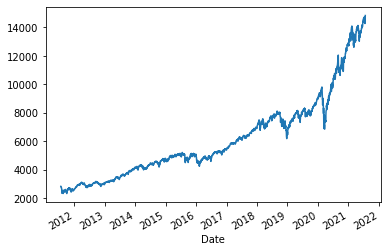

In [4]:
import matplotlib.pyplot as plt
NASDAQ.plot()
plt.show()

In [5]:
pip install Prophet

     |████████████████████████████████| 65 kB 575 kB/s eta 0:00:01
     |████████████████████████████████| 49 kB 1.6 MB/s eta 0:00:01
  Created wheel for Prophet: filename=prophet-1.0.1-py3-none-any.whl size=6644710 sha256=18b7018f82063b94ce8fe19f425a15be7a5f23264d17b04c35a449ccc042ef31
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built Prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [6]:
from fbprophet import Prophet
import warnings
import datetime as dt
warnings.simplefilter(action='ignore',category=FutureWarning)
NASDAQ = yf.download(tickers='^IXIC', period = '20y', interval = '1d')

[*********************100%***********************]  1 of 1 completed


In [7]:
modelfb = Prophet()
NASDAQ = NASDAQ.reset_index()
NASDAQ[['ds','y']] = NASDAQ[['Date','Adj Close']]
modelfb.fit(NASDAQ)
future = modelfb.make_future_dataframe(periods=180)


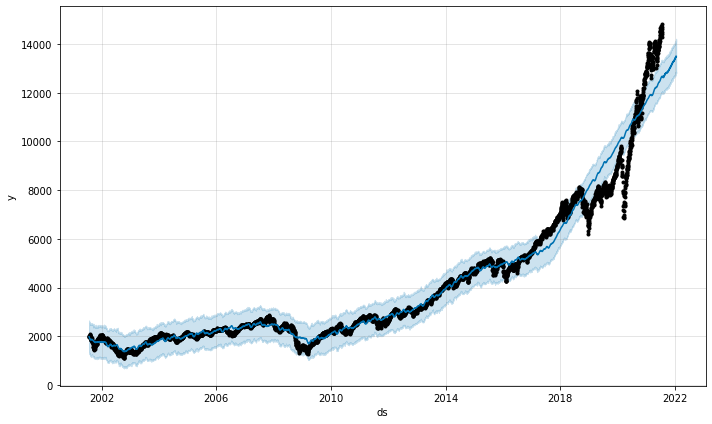

In [8]:
forecast = modelfb.predict(future)
modelfb.plot(forecast)
plt.show()

In [9]:
import plotly.express as px
fig = px.line(forecast, x='ds', y="yhat")
fig.show()